In [1]:
#import the library 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
# #version of library
# #pd.__version__
# print("version of pandas lib:", pd.__version__)

In [3]:
#read csv data set
data = pd.read_csv('dataset.csv')

In [4]:
#check the dataset
data.head()

,Unnamed: 0,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,0,1.020,-0.144,-0.0392,-41.6,12.6,-11.500,-0.725,0.237,-0.649,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
1,1,0.931,-0.046,0.0547,-13.3,45.4,-5.730,-0.671,0.231,-0.748,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
2,2,0.877,-0.107,-0.1520,-42.0,20.7,-0.854,-0.780,0.197,-0.713,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
3,3,0.877,-0.107,-0.1520,-42.0,20.7,-0.854,-0.818,0.169,-0.727,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
4,4,1.090,0.040,0.0464,-16.6,-19.3,4.270,-0.798,0.172,-0.695,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals


In [8]:
data["Target_class"].unique()

array(['cereals', 'dishes', 'laptop', 'newspaper', 'sandwich',
       'smartphone', 'table', 'tea', 'tidy'], dtype=object)

In [84]:
data = data.rename({'Unnamed: 25': 'Target_class'}, axis=1)

In [85]:
# #check the dataset
# data.head()

In [86]:
#data shape
data.shape

(17083, 25)

In [87]:
#data types present in the dataset
data.dtypes

Unnamed: 0            int64
Waist_accX          float64
Waist_accY          float64
Waist_accZ          float64
Waist_gyroX         float64
Waist_gyroY         float64
Waist_gyroZ         float64
Wrist_accX          float64
Wrist_accY          float64
Wrist_accZ          float64
Wrist_gyroX         float64
Wrist_gyroY         float64
Wrist_gyroZ         float64
Ktch_T4_Cupboard    float64
Ktch_B4_Cupboard    float64
Ktch_Motion_1       float64
Ktch_B1_Draw        float64
Ktch_T2_Cupboard    float64
Ktch_Motion_2       float64
Ktch_T1_Cupboard    float64
Ktch_B2_Cupboard    float64
Ktch_B3_Cupboard    float64
Ktch_T3_Cupboard    float64
TP_L_Power          float64
Target_class         object
dtype: object

In [88]:
#check missing values by summing up null values in the dataset
data.isna().sum()

Unnamed: 0          0
Waist_accX          0
Waist_accY          0
Waist_accZ          0
Waist_gyroX         0
Waist_gyroY         0
Waist_gyroZ         0
Wrist_accX          0
Wrist_accY          0
Wrist_accZ          0
Wrist_gyroX         0
Wrist_gyroY         0
Wrist_gyroZ         0
Ktch_T4_Cupboard    0
Ktch_B4_Cupboard    0
Ktch_Motion_1       0
Ktch_B1_Draw        0
Ktch_T2_Cupboard    0
Ktch_Motion_2       0
Ktch_T1_Cupboard    0
Ktch_B2_Cupboard    0
Ktch_B3_Cupboard    0
Ktch_T3_Cupboard    0
TP_L_Power          0
Target_class        0
dtype: int64

In [89]:
data['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
17078    17078
17079    17079
17080    17080
17081    17081
17082    17082
Name: Unnamed: 0, Length: 17083, dtype: int64

In [90]:
del data['Unnamed: 0']

In [91]:
#check missing values by summing up null values in the dataset
data.isna().sum()

Waist_accX          0
Waist_accY          0
Waist_accZ          0
Waist_gyroX         0
Waist_gyroY         0
Waist_gyroZ         0
Wrist_accX          0
Wrist_accY          0
Wrist_accZ          0
Wrist_gyroX         0
Wrist_gyroY         0
Wrist_gyroZ         0
Ktch_T4_Cupboard    0
Ktch_B4_Cupboard    0
Ktch_Motion_1       0
Ktch_B1_Draw        0
Ktch_T2_Cupboard    0
Ktch_Motion_2       0
Ktch_T1_Cupboard    0
Ktch_B2_Cupboard    0
Ktch_B3_Cupboard    0
Ktch_T3_Cupboard    0
TP_L_Power          0
Target_class        0
dtype: int64

In [92]:
#remove redundant column
# del data['Target_Class']

In [93]:
data.head()

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,1.020,-0.144,-0.0392,-41.6,12.6,-11.500,-0.725,0.237,-0.649,2.320,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
1,0.931,-0.046,0.0547,-13.3,45.4,-5.730,-0.671,0.231,-0.748,-0.122,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
2,0.877,-0.107,-0.1520,-42.0,20.7,-0.854,-0.780,0.197,-0.713,-5.300,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
3,0.877,-0.107,-0.1520,-42.0,20.7,-0.854,-0.818,0.169,-0.727,-6.650,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals
4,1.090,0.040,0.0464,-16.6,-19.3,4.270,-0.798,0.172,-0.695,-6.710,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,cereals


In [94]:
#final dataset after dataprocessing
data.shape

(17083, 24)

In [95]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [98]:
import pandas
from sklearn import preprocessing 

In [99]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_target = LabelEncoder()
data.loc[:,"Target_class"]=labelencoder_target.fit_transform(data.loc[:,"Target_class"])

In [100]:
data.Target_class

0        0
1        0
2        0
3        0
4        0
        ..
17078    8
17079    8
17080    8
17081    8
17082    8
Name: Target_class, Length: 17083, dtype: int32

In [101]:
data

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,1.020,-0.1440,-0.0392,-41.6,12.60,-11.500,-0.725,0.237,-0.649,2.320,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0
1,0.931,-0.0460,0.0547,-13.3,45.40,-5.730,-0.671,0.231,-0.748,-0.122,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0
2,0.877,-0.1070,-0.1520,-42.0,20.70,-0.854,-0.780,0.197,-0.713,-5.300,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0
3,0.877,-0.1070,-0.1520,-42.0,20.70,-0.854,-0.818,0.169,-0.727,-6.650,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0
4,1.090,0.0400,0.0464,-16.6,-19.30,4.270,-0.798,0.172,-0.695,-6.710,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,0.961,0.0573,-0.0876,-24.6,0.61,7.990,-1.530,-0.198,-0.187,178.000,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,8
17079,0.977,0.0857,-0.0814,-22.4,-3.78,6.650,-1.530,-0.198,-0.187,178.000,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,8
17080,0.967,0.0850,-0.0775,-24.5,-4.70,5.610,-1.400,-0.173,-0.146,155.000,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,8
17081,0.932,0.0829,-0.0632,-29.5,-7.20,3.840,-1.050,-0.479,-0.124,38.000,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,8


In [102]:
#storing the target class in variable y
y= data['Target_class']

In [103]:
y.dtypes

dtype('int32')

In [104]:
#dropping the target class from the dataframe, because normalization is applied over DF
# data = data.drop('Target_class', axis=1)

In [105]:
data.shape

(17083, 24)

In [106]:
# #normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

In [107]:
#Scaling function returns in numpy array
scaled

array([[0.54713494, 0.4866485 , 0.54608059, ..., 0.        , 0.        ,
        0.        ],
       [0.50600739, 0.5133515 , 0.58047619, ..., 0.        , 0.        ,
        0.        ],
       [0.4810536 , 0.49673025, 0.5047619 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.52264325, 0.54904632, 0.53205128, ..., 0.        , 0.        ,
        1.        ],
       [0.5064695 , 0.54847411, 0.53728938, ..., 0.        , 0.        ,
        1.        ],
       [0.50369686, 0.54675749, 0.53626374, ..., 0.        , 0.        ,
        1.        ]])

In [108]:
# normalization, to regain column & indices in the dataframe
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(data)
Scaled_features = pd.DataFrame(scaled, index=data.index, columns=data.columns)

In [109]:
# it only contains the features & not the target class
Scaled_features

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,0.547135,0.486649,0.546081,0.487247,0.436850,0.413738,0.395963,0.665774,0.159048,0.546579,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.506007,0.513351,0.580476,0.497108,0.482982,0.432173,0.412733,0.663988,0.127619,0.542562,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.378882,0.653869,0.138730,0.534046,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.367081,0.645536,0.134286,0.531826,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.579482,0.536785,0.577436,0.495958,0.391983,0.464121,0.373292,0.646429,0.144444,0.531727,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,0.519871,0.541499,0.528352,0.493171,0.419986,0.476006,0.145963,0.536310,0.305714,0.835526,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
17079,0.527264,0.549237,0.530623,0.493937,0.413812,0.471725,0.145963,0.536310,0.305714,0.835526,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
17080,0.522643,0.549046,0.532051,0.493206,0.412518,0.468403,0.186335,0.543750,0.318730,0.797697,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
17081,0.506470,0.548474,0.537289,0.491463,0.409001,0.462748,0.295031,0.452679,0.325714,0.605263,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [110]:
#adding the target class back with features after normalization of data
Scaled_features['Target_class']= y

In [111]:
Scaled_features

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,0.547135,0.486649,0.546081,0.487247,0.436850,0.413738,0.395963,0.665774,0.159048,0.546579,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
1,0.506007,0.513351,0.580476,0.497108,0.482982,0.432173,0.412733,0.663988,0.127619,0.542562,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
2,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.378882,0.653869,0.138730,0.534046,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.367081,0.645536,0.134286,0.531826,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,0.579482,0.536785,0.577436,0.495958,0.391983,0.464121,0.373292,0.646429,0.144444,0.531727,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,0.519871,0.541499,0.528352,0.493171,0.419986,0.476006,0.145963,0.536310,0.305714,0.835526,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8
17079,0.527264,0.549237,0.530623,0.493937,0.413812,0.471725,0.145963,0.536310,0.305714,0.835526,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8
17080,0.522643,0.549046,0.532051,0.493206,0.412518,0.468403,0.186335,0.543750,0.318730,0.797697,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8
17081,0.506470,0.548474,0.537289,0.491463,0.409001,0.462748,0.295031,0.452679,0.325714,0.605263,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,8


In [112]:
Scaled_features.isnull().sum()

Waist_accX          0
Waist_accY          0
Waist_accZ          0
Waist_gyroX         0
Waist_gyroY         0
Waist_gyroZ         0
Wrist_accX          0
Wrist_accY          0
Wrist_accZ          0
Wrist_gyroX         0
Wrist_gyroY         0
Wrist_gyroZ         0
Ktch_T4_Cupboard    0
Ktch_B4_Cupboard    0
Ktch_Motion_1       0
Ktch_B1_Draw        0
Ktch_T2_Cupboard    0
Ktch_Motion_2       0
Ktch_T1_Cupboard    0
Ktch_B2_Cupboard    0
Ktch_B3_Cupboard    0
Ktch_T3_Cupboard    0
TP_L_Power          0
Target_class        0
dtype: int64

In [113]:
# data.to_csv('Scaled_features.csv')

In [114]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [115]:
import tensorflow as tf
print('Tensorflow version',tf.__version__)

Tensorflow version 2.6.0


In [116]:
import sklearn

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
print('scikit-learn version',sklearn. __version__)

scikit-learn version 0.23.1


In [120]:
Scaled_features.head()

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power,Target_class
0,0.547135,0.486649,0.546081,0.487247,0.436850,0.413738,0.395963,0.665774,0.159048,0.546579,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
1,0.506007,0.513351,0.580476,0.497108,0.482982,0.432173,0.412733,0.663988,0.127619,0.542562,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
2,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.378882,0.653869,0.138730,0.534046,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.367081,0.645536,0.134286,0.531826,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,0.579482,0.536785,0.577436,0.495958,0.391983,0.464121,0.373292,0.646429,0.144444,0.531727,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0


In [121]:
Scaled_features.dtypes

Waist_accX          float64
Waist_accY          float64
Waist_accZ          float64
Waist_gyroX         float64
Waist_gyroY         float64
Waist_gyroZ         float64
Wrist_accX          float64
Wrist_accY          float64
Wrist_accZ          float64
Wrist_gyroX         float64
Wrist_gyroY         float64
Wrist_gyroZ         float64
Ktch_T4_Cupboard    float64
Ktch_B4_Cupboard    float64
Ktch_Motion_1       float64
Ktch_B1_Draw        float64
Ktch_T2_Cupboard    float64
Ktch_Motion_2       float64
Ktch_T1_Cupboard    float64
Ktch_B2_Cupboard    float64
Ktch_B3_Cupboard    float64
Ktch_T3_Cupboard    float64
TP_L_Power          float64
Target_class          int32
dtype: object

In [122]:
#segeregating independent and dependent variables

# Independent variables as X, axis=1 rep column hence deleting dependent variable(target class)
x = Scaled_features.drop('Target_class', axis=1)

In [123]:
x

,Waist_accX,Waist_accY,Waist_accZ,Waist_gyroX,Waist_gyroY,Waist_gyroZ,Wrist_accX,Wrist_accY,Wrist_accZ,Wrist_gyroX,...,Ktch_B4_Cupboard,Ktch_Motion_1,Ktch_B1_Draw,Ktch_T2_Cupboard,Ktch_Motion_2,Ktch_T1_Cupboard,Ktch_B2_Cupboard,Ktch_B3_Cupboard,Ktch_T3_Cupboard,TP_L_Power
0,0.547135,0.486649,0.546081,0.487247,0.436850,0.413738,0.395963,0.665774,0.159048,0.546579,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.506007,0.513351,0.580476,0.497108,0.482982,0.432173,0.412733,0.663988,0.127619,0.542562,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.378882,0.653869,0.138730,0.534046,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.481054,0.496730,0.504762,0.487108,0.448242,0.447751,0.367081,0.645536,0.134286,0.531826,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.579482,0.536785,0.577436,0.495958,0.391983,0.464121,0.373292,0.646429,0.144444,0.531727,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17078,0.519871,0.541499,0.528352,0.493171,0.419986,0.476006,0.145963,0.536310,0.305714,0.835526,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17079,0.527264,0.549237,0.530623,0.493937,0.413812,0.471725,0.145963,0.536310,0.305714,0.835526,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17080,0.522643,0.549046,0.532051,0.493206,0.412518,0.468403,0.186335,0.543750,0.318730,0.797697,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17081,0.506470,0.548474,0.537289,0.491463,0.409001,0.462748,0.295031,0.452679,0.325714,0.605263,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [124]:
x.shape, y.shape

((17083, 23), (17083,))

In [125]:
#  training & test set

# stratify is to make the similar distribution of classes in train and test set 
# random state is to regenerate the same train and validation set
# test size 0.2 will keep 20% data in test and remaining 80% in train set

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=Scaled_features['Target_class'],random_state=10,test_size=0.2)


In [126]:
# shape of training and test set
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((13666, 23), (13666,)), ((3417, 23), (3417,)))

In [127]:
y_test.shape

(3417,)

In [128]:
# checking the version of keras
import keras
print(keras.__version__)

2.6.0


In [129]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


In [130]:
#importing the sequential model
from keras.models import Sequential

In [131]:
#importing different layers from keras
from keras.layers import InputLayer, Dense 

In [132]:
#number of input neurons
x_train.shape

(13666, 23)

In [133]:
y_train.shape

(13666,)

In [134]:
#number of features in the data
x_train.shape[1]

23

In [135]:
#one hot encoding on labels(to convert categorical) 
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 9)
y_test = to_categorical(y_test, 9)

In [136]:
#input neurons
input_neurons = x_train.shape[1]

In [137]:
# number of output neurons
output_neurons = 9

In [138]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 3
neuron_hidden_layer_1 = 15
neuron_hidden_layer_2 = 10
neuron_hidden_layer_3 = 5

In [139]:
# defining the architecture of the model
model = Sequential()
#model.add(InputLayer(input_shape=(input_neurons,)))

model.add(Dense(units=neuron_hidden_layer_1, activation='relu', input_shape = (13666, 23 )))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=output_neurons, activation='softmax'))

In [140]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13666, 15)         360       
_________________________________________________________________
dense_5 (Dense)              (None, 13666, 10)         160       
_________________________________________________________________
dense_6 (Dense)              (None, 13666, 5)          55        
_________________________________________________________________
dense_7 (Dense)              (None, 13666, 9)          54        
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [141]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [142]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [143]:
# compiling the model
# optimizer
# Adadelta: Optimizer that implements the Adadelta algorithm.
# Adagrad: Optimizer that implements the Adagrad algorithm.
# Adam: Optimizer that implements the Adam algorithm.
# Adamax: Optimizer that implements the Adamax algorithm.
# Ftrl: Optimizer that implements the FTRL algorithm.
# Nadam: Optimizer that implements the NAdam algorithm.
# Optimizer class: Base class for Keras optimizers.
# RMSprop: Optimizer that implements the RMSprop algorithm.
# SGD: Gradient descent (with momentum) optimizer.

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [144]:
#model_history = model.fit(x_train, y_train, epochs=3)
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=90)

Epoch 1/90
428/428 [==============================] - 1s 814us/step - loss: 1.8246 - accuracy: 0.2897 - val_loss: 1.5199 - val_accuracy: 0.3892
Epoch 2/90
428/428 [==============================] - 0s 592us/step - loss: 1.4113 - accuracy: 0.4592 - val_loss: 1.3002 - val_accuracy: 0.4937
Epoch 3/90
428/428 [==============================] - 0s 589us/step - loss: 1.2097 - accuracy: 0.5240 - val_loss: 1.1599 - val_accuracy: 0.5797
Epoch 4/90
428/428 [==============================] - 0s 608us/step - loss: 1.1098 - accuracy: 0.5768 - val_loss: 1.0971 - val_accuracy: 0.6096
Epoch 5/90
428/428 [==============================] - 0s 565us/step - loss: 1.0462 - accuracy: 0.6110 - val_loss: 1.0236 - val_accuracy: 0.6263
Epoch 6/90
428/428 [==============================] - 0s 585us/step - loss: 0.9924 - accuracy: 0.6251 - val_loss: 0.9767 - val_accuracy: 0.6280
Epoch 7/90
428/428 [==============================] - 0s 567us/step - loss: 0.9490 - accuracy: 0.6271 - val_loss: 0.9420 - val_accuracy:

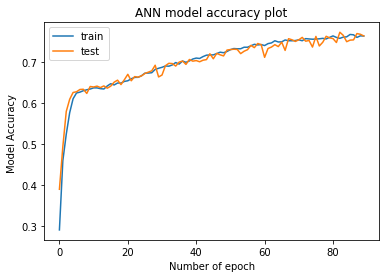

In [145]:
# plotting the  accuracy graph
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('ANN model accuracy plot')
plt.ylabel('Model Accuracy ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

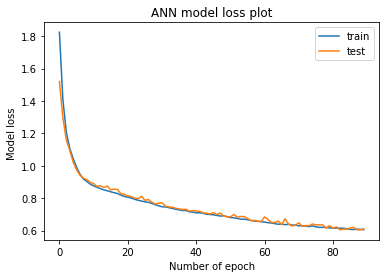

In [146]:
# plotting the  accuracy graph
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('ANN model loss plot')
plt.ylabel('Model loss ')
plt.xlabel('Number of epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [147]:
# evaluate the model
train_acc = model.evaluate(x_train, y_train, verbose=1)


428/428 [==============================] - 0s 375us/step - loss: 0.6048 - accuracy: 0.7669


In [148]:
test_acc = model.evaluate(x_test, y_test, verbose=1)

107/107 [==============================] - 0s 451us/step - loss: 0.6105 - accuracy: 0.7647


In [158]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[208   4   0   0 210   0  13  27   1]
 [ 24 297   0   0  44   0  18  38   0]
 [  0   0 271   0   0   3   0   0   0]
 [  0   5   0 241   0   0   0  10   0]
 [ 75   4   2   0 569   0  10  27   9]
 [  0   0   1   0   0 293   0   0   0]
 [  4   9   0   0  87   0 113   5   1]
 [ 42  30   0   2  86   0   4 355   0]
 [  0   0   0   0   9   0   0   0 266]]


In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model, y_test, y_pred)  
# plt.show()

In [150]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis =1)

In [ ]:
y_pred

In [ ]:
y_test

In [161]:
Recall = recall_score(y_pred, y_test, average='weighted')
precision = precision_score(y_pred, y_test, average='weighted')
F1score = f1_score(y_pred, y_test, average='weighted')
print("Recall score = ", Recall)
print("precision score = ", precision)
print("F1 score = ", F1score)

Recall score =  0.7647058823529411
precision score =  0.7862547029036525
F1 score =  0.7659702580731667


In [ ]:
F1score = f1_score(y_pred, y_test, average='weighted')
print(F1score)